In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A análise a seguir tem como objetivo praticar análise exploratória dos dados respondendo a algumas questões previamente estipuladas:
<br>
<br>
1 - Qual o número de reclamações por Estado?
<br>
2 - Qual a quantidade de reclamações por sexo?
<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?
<br>
4 - Proporção de reclamações registradas e não respondidas.
<br>
5 - Qual segmento de mercado é o maior alvo de reclamações?
<br>
6 - Quais os problemas mais frequentes nas reclamações?
<br>
7 - Proposta de solução de problemas.



fonte : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 

In [2]:
df = pd.read_csv("dadosgovbr---2014.csv", sep=';', encoding='latin-')

In [3]:
df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [4]:
#Tendo uma visão mais geral da estrutura da tabela:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43987 entries, 0 to 43986
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gestor                  43987 non-null  object 
 1   Canal de Origem         43987 non-null  object 
 2   Região                  43987 non-null  object 
 3   UF                      43987 non-null  object 
 4   Cidade                  43987 non-null  object 
 5   Sexo                    43987 non-null  object 
 6   Faixa Etária            43987 non-null  object 
 7   Ano Abertura            43987 non-null  int64  
 8   Mês Abertura            43987 non-null  int64  
 9   Data Abertura           43987 non-null  object 
 10  Hora Abertura           43987 non-null  object 
 11  Data Resposta           41961 non-null  object 
 12  Hora Resposta           41961 non-null  object 
 13  Data Análise            1953 non-null   object 
 14  Hora Análise            1953 non-null 

### Entendendo as reclamações por Estado.

In [5]:
#Valores exatos das reclamações por estado.

df.UF.value_counts()

SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64

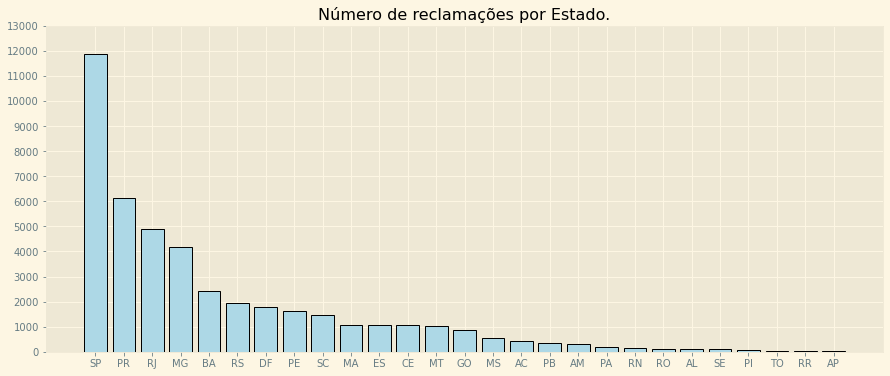

In [6]:
# Gráfico do número de reclamações por Estado.
x = ['SP', 'PR', 'RJ', 'MG', 'BA', 'RS', 'DF', 'PE', 'SC', 'MA', 'ES',
       'CE', 'MT', 'GO', 'MS', 'AC', 'PB', 'AM', 'PA', 'RN', 'RO', 'AL',
       'SE', 'PI', 'TO', 'RR', 'AP']
y = df.UF.value_counts()
y_label = np.arange(0,14000,1000)
plt.style.use(['Solarize_Light2'])

fig = plt.figure(figsize=[15,6])
rec_uf = plt.bar(x,y, color='lightblue', edgecolor='black')
plt.title('Número de reclamações por Estado.')
plt.xticks(df.UF.unique())
plt.yticks(y_label)
plt.show()

O estado de São paulo lidera com aproximadamente o dobro de reclamções do segundo lugar. Algo previsível já que é a capital econômica do país.

### Entendendo a quantidade de reclamações por sexo:

In [7]:
#Quantidade de reclamações por sexo:

sex_val = df.Sexo.value_counts()
sex_val

M    27895
F    16092
Name: Sexo, dtype: int64

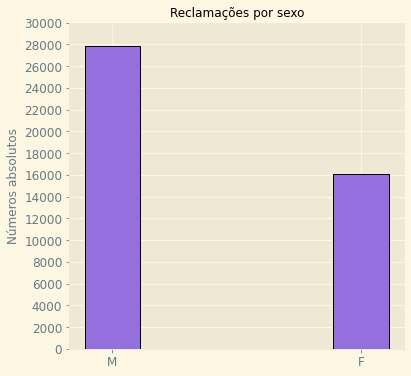

In [8]:
#Gráfico das reclamações por sexo:

y_sex = 'M','F'
width = 0.45
y_label_sex = np.arange(0,32000,2000)
plt.figure(figsize=[6,6])
plt.bar(y_sex, sex_val, width/2, color='mediumpurple', edgecolor='black')
plt.yticks(y_label_sex, fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Números absolutos')
plt.title('Reclamações por sexo', fontsize=12)
plt.show()

Em números absolutos percebemos que os homens somam maior quantidade de reclamações, não é possível inferir muito sobre as causas desse dado são necessários mais estudos em cima dessa questão específica.

### Entendendo tempo de resposta com relação a nota do consumidor:

In [9]:
#Renomeando as colunas para tirar os espaços.

df.rename(columns = {"Tempo Resposta":"tempo_resposta","Nota do Consumidor":"nota_consumidor"}, inplace = True)

In [10]:
#Conferindo nulls nas variáveis:
print("\nNulos na tempo de resposta:\n",df.tempo_resposta.isnull().value_counts())
print("\nNulos na nota do consumidor:\n",df.nota_consumidor.isnull().value_counts())

#A quantidade de nulos pode enviesar a análise. Veremos como lidar com essa questão mais adiante.


Nulos na tempo de resposta:
 False    41961
True      2026
Name: tempo_resposta, dtype: int64

Nulos na nota do consumidor:
 False    28627
True     15360
Name: nota_consumidor, dtype: int64


In [11]:
#Correlação sem substituição de nulos:

df[["tempo_resposta","nota_consumidor"]].corr()

#Podemos perceber que a relação é negativa e muito fraca. (a quantidade de nulos pode afetar essa relação)

,tempo_resposta,nota_consumidor
tempo_resposta,1.00000,-0.18715
nota_consumidor,-0.18715,1.00000


In [12]:
#separando os dados para o gráfico:
cons_val = df.nota_consumidor.value_counts().reset_index().sort_values(by='nota_consumidor',ascending=False)
cons_val

,index,nota_consumidor
0,1.0,9904
1,5.0,8789
2,4.0,4309
3,3.0,3747
4,2.0,1878


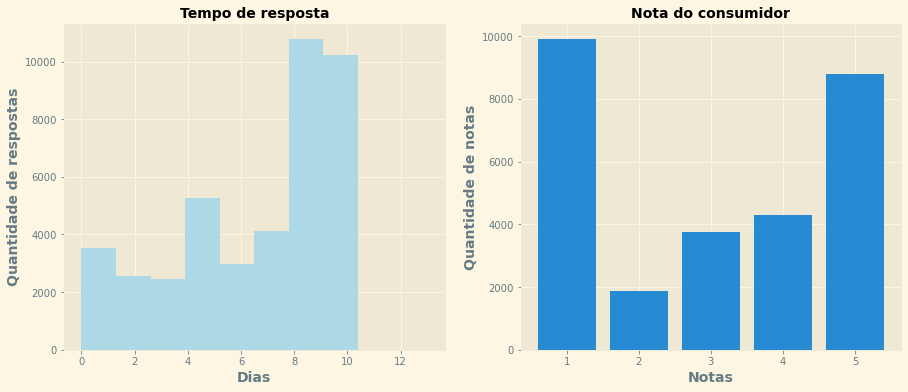

In [13]:
#Entendendo graficamente essas distribuições.
y_sca = np.arange(0,13,0.5)


plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.hist(df.tempo_resposta, color='lightblue')
plt.xlabel('Dias',fontsize = 14, fontweight = "bold")
plt.ylabel('Quantidade de respostas', fontsize = 14, fontweight = "bold")
plt.title("Tempo de resposta", fontsize = 14, fontweight = "bold")
plt.subplot(1,2,2)
plt.bar(cons_val['index'],cons_val.nota_consumidor)
plt.xlabel("Notas",fontsize = 14, fontweight = "bold")
plt.ylabel("Quantidade de notas", fontsize = 14, fontweight = "bold")
plt.title("Nota do consumidor",fontsize = 14, fontweight = "bold")
plt.show()



Pelos gráficos podemos perceber que a maior parte das respostas levou entre 7 e 10 dias para ser respondida e que
as notas variam muito entre a nota mais baixa e mais alta, tendo menores concentrações nas notas médias. Pode existir aqui uma relação, já que as distribuições não são normais. A disparidade entre os extremos da avaliação anuncia isso. Vamos tentar olhar por outro ângulo.

<AxesSubplot:title={'center':'nota_consumidor'}, xlabel='tempo_resposta'>

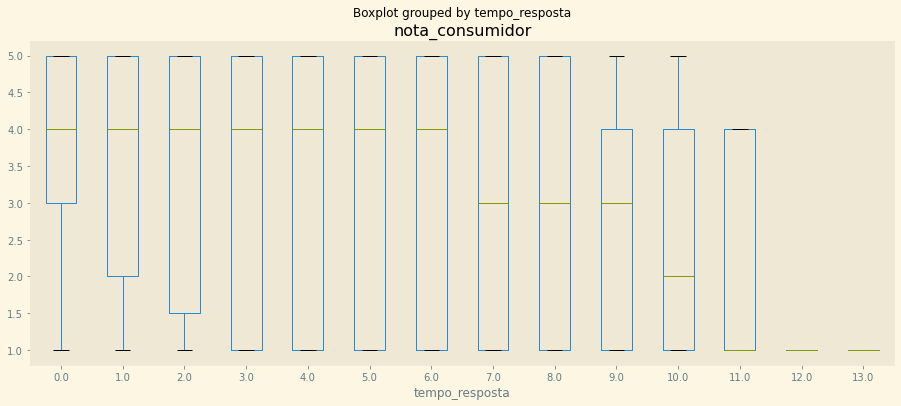

In [14]:
#Boxplot

df.boxplot(column = 'nota_consumidor', by = 'tempo_resposta', figsize=[15,6], grid = False)

O gráfico boxplot aponta para uma relação entre a nota e o tempo de resposta: podemos perceber que respostas dentro de 6 dias
tem como mediana a nota 4 de forma constante, a partir de 7 dias a mediana cai para três e segue caindo em sequência.
O mesmo vale para os quantis que nas respostas mais rápidas ficam em valores mais altos e nas respostas mais demoradas
assumem valores mais baixos.
O cálculo de correlação aponta uma fraca correlação negativa provavelmente pela presença de muitos nulos na variável 
nota_consumidor, mas se pensarmos a correlação conectada a visualização dos boxplots percebemos que de fato existe 
uma relação entre avaliações mais baixas e tempos maiores de resposta. Dados mais precisos, com menos nulos, poderiam 
comprovar melhor essa relação, mas ela de fato existe.
<br>
<br>
Podemos inferir que empresas que quiserem ser melhor avaliadas com relação a prestação de serviços devem responder o mais rápido possível tendo como prazo limite a primeira semana. Após isso é muito mais provável que sua avaliação seja baixa.

In [15]:
#valores absolutos da notas e tempos de resposta:

print("\nTempo de resposta:\n",df.tempo_resposta.value_counts())

print('¨'*40)

print("\nNotas dos consumidores:\n",df.nota_consumidor.value_counts())


Tempo de resposta:
 10.0    10234
9.0      5436
8.0      5340
7.0      4122
6.0      2985
5.0      2704
4.0      2577
2.0      2564
1.0      2561
3.0      2466
0.0       962
11.0        7
13.0        2
12.0        1
Name: tempo_resposta, dtype: int64
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

Notas dos consumidores:
 1.0    9904
5.0    8789
4.0    4309
3.0    3747
2.0    1878
Name: nota_consumidor, dtype: int64


### Proporção de reclamações registradas e não respondidas:

In [16]:
#proporação de reclamações registrada e não respondidas.

df.Respondida.value_counts()

S    41961
N     2026
Name: Respondida, dtype: int64

In [17]:
#Valores individuais divididos pelo total.
prop_resp1 = round(df[df.Respondida =='S'].shape[0]/ df.Respondida.shape[0],2)
prop_resp2 = round(df[df.Respondida =='N'].shape[0]/ df.Respondida.shape[0],2)
print('\nProporção de respondidas:\n',prop_resp1)
print('\nProporção de não respondidas:\n',prop_resp2)

#Ou seja, 5% das reclamações registradas não são respondidas.


Proporção de respondidas:
 0.95

Proporção de não respondidas:
 0.05


### Qual segmento de mercado é o maior alvo de reclamações?

In [18]:
#Tratando o nome da coluna para facilitar trabalhar com os dados:

df.rename(columns = {"Segmento de Mercado":"seg_merc"}, inplace = True)

In [19]:
#Entendendo melhor os dados do segmento de mercado.

df.seg_merc.value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    23962
Bancos, Financeiras e Administradoras de Cartão                             8809
Comércio Eletrônico                                                         6074
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       1725
Varejo                                                                      1008
Transporte Aéreo                                                             430
Corretoras e Sociedades de Seguros, Capitalização e Previdência              378
Fabricantes - Linha Branca                                                   367
Agências de Viagens                                                          324
Operadoras de Planos de Saúde e Administradoras de Benefícios                250
Supermercados                                                                205
Administradoras de Consórcios                                                139
Energia Elétrica, Gás, Água 

Percebendo a quantidade majoritária de reclamações direcionadas a poucos segmentos, vamos montar um gráfico para visualizar melhor essas proporções.

In [20]:
#tratando os dados para o gráfico:
legendax = df['seg_merc'].value_counts().reset_index().sort_values(by='seg_merc', ascending=False)
legendax = pd.DataFrame(legendax)

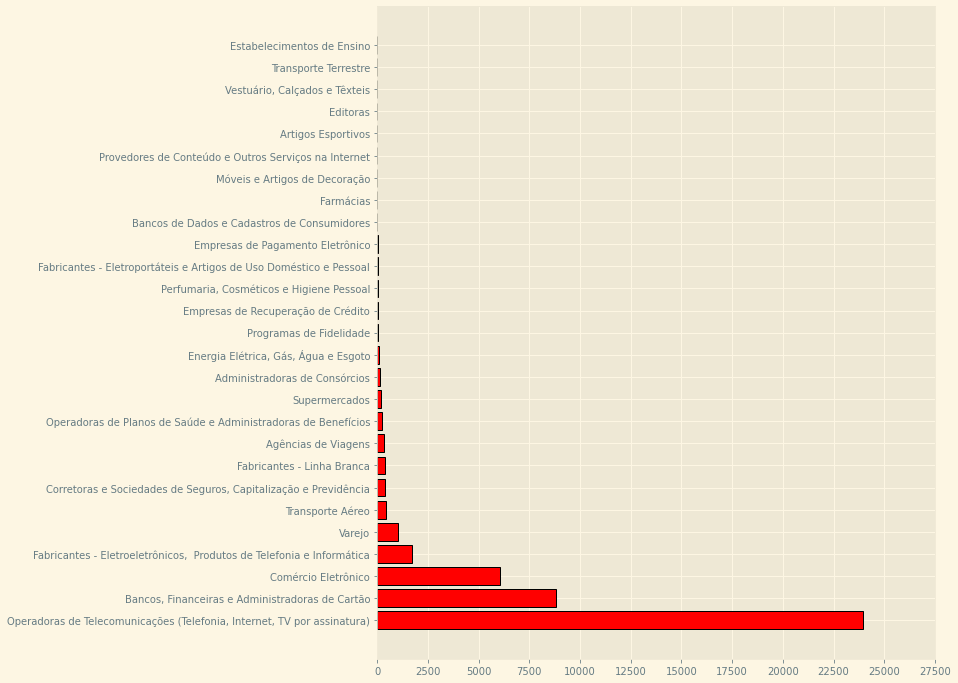

In [21]:
#Gráfico mostrando quantidade de reclamações por segmento de mercado.
labelx = legendax['index']
labely = df.seg_merc.value_counts()
x_tick = np.arange(0,28000,2500)

plt.figure(figsize=[10,12])
plt.barh(labelx,labely,color='red',edgecolor='black')
plt.xticks(x_tick)
plt.show()

Por esse gráfico podemos perceber os principais responsáveis por reclamações. Operadoras de Telecomunicações acumulam o maior volume, tendo um valor maior que o dobro do segundo lugar (Bancos, Financeiras e Administradoras de Cartão). Apenas na visualização deste gráfico podemos inferir que o setor precisa de melhora na qualidade do serviço.
No entanto sem entender quais são os principais problemas não podemos encontrar respostas mais precisas, por isso vamos entender quais são as reclamações mais frequentes.

In [22]:
#Entendendo quais as reclamações mais frequentes.
df.Problema.value_counts().sort_values(ascending=False)

Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa      7039
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado          3572
Funcionamento inadequado do serviço (má qualidade do sinal, instabilidade, queda)       2932
SAC - Demanda não resolvida / não respondida / respondida após o prazo                  2932
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores    1977
                                                                                        ... 
Fechamento da instituição (descontinuidade do serviço)                                     1
Não fornecimento de nota fiscal/recibo                                                     1
Inadequação das instalações / condições sanitárias                                         1
Descumprimento de prazo para consulta/ exames                                              1
Informação nutricional falsa / incompleta / inadequada sobre o produto

In [23]:
#Separando os problemas num novo dataframe para plotagem do gráfico.
prob_val = df['Problema'].value_counts().reset_index().sort_values(by='Problema',ascending=False)
prob_val = pd.DataFrame(prob_val)
prob_val

,index,Problema
0,Oferta não cumprida / serviço não fornecido/ v...,7039
1,Cobrança por serviço/produto não contratado / ...,3572
2,Funcionamento inadequado do serviço (má qualid...,2932
3,SAC - Demanda não resolvida / não respondida /...,2932
4,Dificuldade / atraso na devolução de valores p...,1977
...,...,...
125,Fechamento da instituição (descontinuidade do ...,1
126,Não fornecimento de nota fiscal/recibo,1
127,Inadequação das instalações / condições sanitá...,1
128,Descumprimento de prazo para consulta/ exames,1


In [24]:
#renomeando o index para descrição dos problemas.

prob_val.rename(columns={'index':'descricao'}, inplace=True)

Text(0.5, 1.0, 'Reclamações mais comuns:')

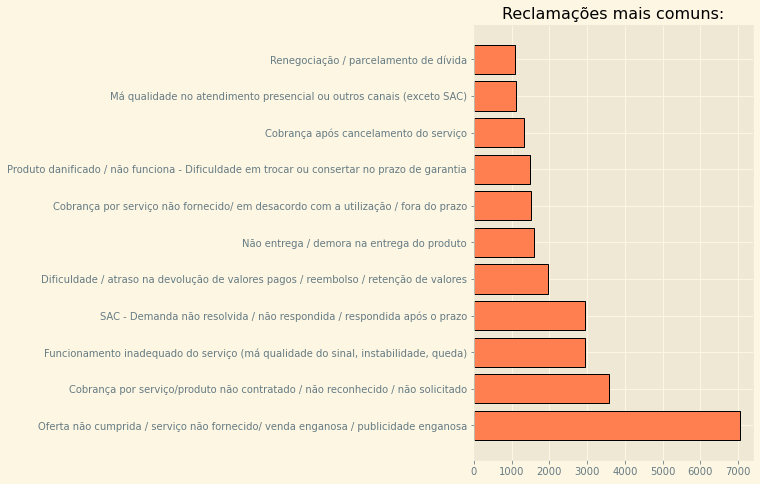

In [25]:
#Gráfico mostrando as principais reclamações (apenas as que acumularam mais de 1000)

fig, ax = plt.subplots(figsize=[5,8])
ax.barh(prob_val['descricao'][:11],prob_val['Problema'][:11], color='coral',edgecolor='black')
ax.set_title('Reclamações mais comuns:')

Analisando o gráfico de problemas mais frequentes é que podemos propor melhores soluções, já que eles são a origem das reclamações. A reclamação mais frequente é de oferta não cumprida, serviço não fornecido, venda/publicidade enganosa. Um problema que pode ser resolvido por várias frentes que vão desde preocupação das próprias empresas em entregar um serviço melhor, quanto de fiscalização por parte dos orgãos reguladores para punir empresas que não respeitam as leis.

Aqui encontra-se uma lacuna: entender qual segmento de mercado mais recebe reclamações, e quais problemas mais frequentes, ambos de maneira geral, demonstram pistas do que pode ser feito, se quisermos propor algo mais específico precisamos entender por segmento de mercado quais são os problemas mais frequentes, restreando diretamente o problema e trazendo a luz soluções mais diretas.

Para isso trabalharemos com a possibilidade de uma empresa de telecomunicações necessitar saber quais os principais problemas do setor para fornecer um serviço de melhor qualidade como seu diferencial de mercado.

In [26]:
#Entendendo quais são os problemas mais comuns por segmento de mercado.

seg_prob = df.loc[:,['seg_merc','Problema']]
seg_prob = pd.DataFrame(seg_prob)
seg_prob.head()

,seg_merc,Problema
0,"Bancos, Financeiras e Administradoras de Cartão",Cobrança de compra/saque não reconhecido
1,Comércio Eletrônico,Não entrega / demora na entrega do produto
2,"Bancos, Financeiras e Administradoras de Cartão",Dificuldade / atraso na devolução de valores p...
3,"Bancos, Financeiras e Administradoras de Cartão","Dados pessoais ou financeiros consultados, col..."
4,"Bancos, Financeiras e Administradoras de Cartão",Cobrança por serviço/produto não contratado / ...


In [27]:
#Ajustando para ver as informações aglutinadas pela quantidade de problemas.

seg_prob_val = seg_prob[['seg_merc','Problema']].value_counts().reset_index().sort_values(by= 'Problema',ascending=False)

In [28]:
seg_prob_val['seg_merc'].value_counts().sort_values(ascending=False)

Bancos, Financeiras e Administradoras de Cartão                            74
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    61
Varejo                                                                     47
Comércio Eletrônico                                                        43
Transporte Aéreo                                                           38
Supermercados                                                              37
Operadoras de Planos de Saúde e Administradoras de Benefícios              36
Corretoras e Sociedades de Seguros, Capitalização e Previdência            36
Administradoras de Consórcios                                              26
Agências de Viagens                                                        23
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática      22
Fabricantes - Linha Branca                                                 17
Energia Elétrica, Gás, Água e Esgoto                            

Estes números demonstram que o segmento de Bancos, Financeiras e operadoras de crédito são os que recebem reclamações mais diversas, seguidos das empresas de telecom

In [29]:
#Delimitando apenas as operadoras de telecomunicações e seus principais problemas.

prob_ope = seg_prob_val[(seg_prob_val.seg_merc == 'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)') & 
             (seg_prob_val.Problema)]
prob_ope = pd.DataFrame(prob_ope)
prob_ope.rename(columns={0:'total'},inplace=True)
prob_ope

,seg_merc,Problema,total
524,"Operadoras de Telecomunicações (Telefonia, Int...","Venda casada (imposição de seguro, empréstimo,...",1
128,"Operadoras de Telecomunicações (Telefonia, Int...","Venda casada (garantia estendida, seguro, curs...",30
89,"Operadoras de Telecomunicações (Telefonia, Int...",Venda casada,64
17,"Operadoras de Telecomunicações (Telefonia, Int...",Suspensão ou desligamento indevido do serviço,610
38,"Operadoras de Telecomunicações (Telefonia, Int...",Serviço indisponível para a região ou sem prev...,279
...,...,...,...
6,"Operadoras de Telecomunicações (Telefonia, Int...",Cobrança após cancelamento do serviço,1311
79,"Operadoras de Telecomunicações (Telefonia, Int...",Cobrança adicional não informada previamente (...,85
519,"Operadoras de Telecomunicações (Telefonia, Int...",Cláusulas irregulares / abusivas / de interpre...,1
12,"Operadoras de Telecomunicações (Telefonia, Int...",Alteração de plano/contrato sem solicitação ou...,687


In [30]:
#Conferindo se o número de problemas encontrados bate com o número de reclamações já retirado mais acima:

prob_ope['total'].sum()

23962

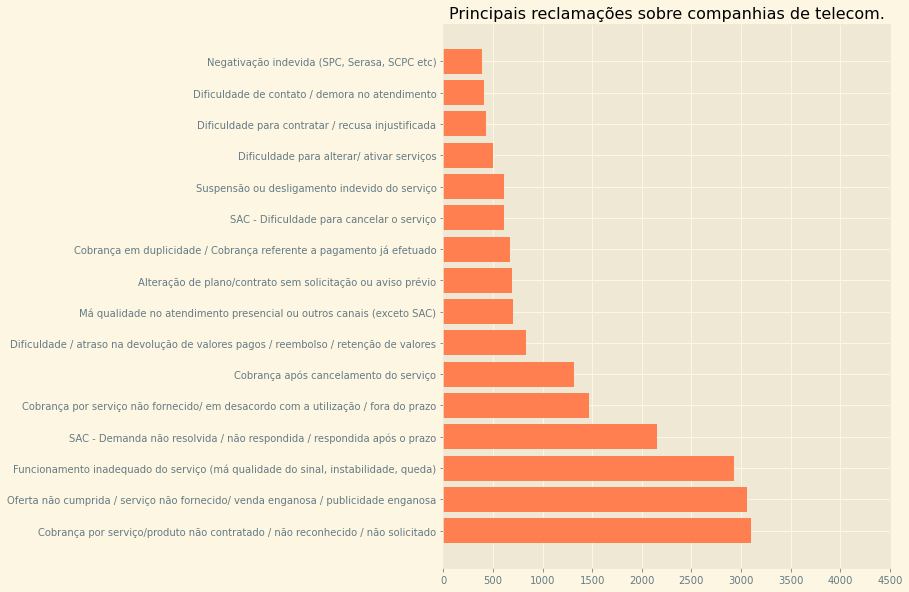

In [31]:
#Entendendo graficamente os principais problemas dessas operadoras de telecomunicações.

#Tratamento dos dados para montagem do gráfico:

eixo_prob = prob_ope.sort_values(by='total',ascending=False)#Ajustando a ordem das reclamações do maior para o menor valor total.
eixo_total = prob_ope.total.sort_values(ascending=False)#Selecionando só o total do maior para o menor.

#Gráfico.
fig, ax2 = plt.subplots(figsize=[8,10])
ax2.barh(eixo_prob.Problema[:16],eixo_total[:16],color='coral')#Slicing dos 15 principais para ser possível gerar o gráfico.
ax2.set_title('Principais reclamações sobre companhias de telecom.')
ax2.set_xticks(np.arange(0,5000,500))
plt.show()

Através desse gráfico podemos perceber que o segmento que mais gera insatisfação, tem também uma variedade grande de problemas relatados pelos consumidores. As cobranças por serviços não contratados, serviços não fornecidos e o funcionamento inadequado do serviço concentram a maior parte das reclamações, e apontam para uma necessidade de revisão das empresas sobre a qualidade do serviço.

Propondo soluções mais diretas, as empresas que sanarem questões de funcionamento inadequado do serviço, serviço não fornecido, cobranças indevidas por serviços não contratados e um melhor atendimento ao consumidor, terão possivelmente uma vantagem diante das outras empresas que apresentam esses problemas. Ações de controle de qualidade dentro dos setores que geram essas reclamações podem ser uma resposta mais rápida e direta para solução desses problemas.